In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
mnist = pd.read_csv("mnist_train.csv")

In [19]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
mnist.shape

(42000, 785)

In [21]:
mnist.size

32970000

In [22]:
mnist.ndim

2

In [23]:
#new=mnist.iloc[:20000,:]
#new.shape

In [24]:
x=new.drop(["label"],axis=1)
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
y=new["label"]
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [26]:
#intialising the PCA

#from sklearn import decomposition
#pca=decomposition.PCA()

from sklearn.decomposition import PCA
pca=PCA(n_components=2)

# Standardize the Data

In [27]:
#Use StandardScaler to help you standardize the dataset’s features 
#onto unit scale (mean = 0 and variance = 1) which is a requirement 
#for the optimal performance of many machine learning algorithms.
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(x)
print(standardized_data.shape)

C:\Users\Jayashree\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(20000, 784)


C:\Users\Jayashree\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# PCA Projection to 2D

In [28]:
#the code projects the original data which is 
#785 dimensional into 2 dimensions
#configuring parameters 
#the no. of components=2
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-669.037496,-684.808037
1,1689.289118,-406.781053
2,-900.493559,-279.027251
3,-161.383764,262.557403
4,1909.008510,-495.900156


In [29]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,label
0,-669.037496,-684.808037,1
1,1689.289118,-406.781053,0
2,-900.493559,-279.027251,1
3,-161.383764,262.557403,4
4,1909.008510,-495.900156,0


# Visualize 2D Projection

C:\Users\Jayashree\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


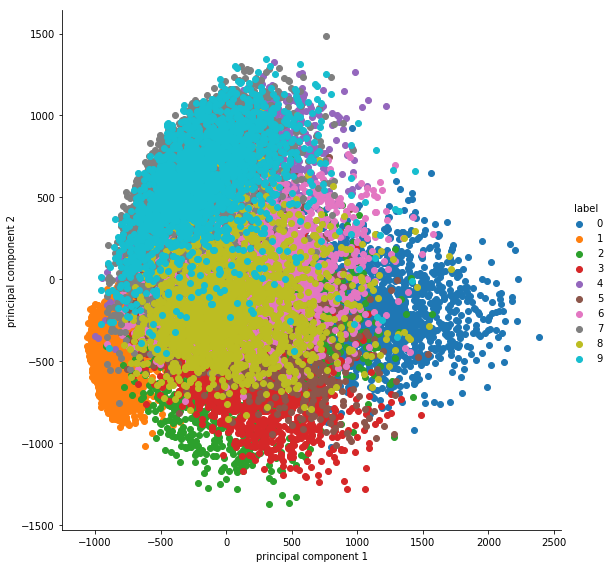

In [30]:
sns.FacetGrid(finalDf,hue="label",size=8)\
    .map(plt.scatter,"principal component 1","principal component 2")\
    .add_legend()